Stacking算法
===
![images](images/01_07_001.png)<br/>
将训练好的所有基模型对整个训练集进行预测，第j个基模型对第i个训练样本的预测值将作为新的训练集中第i个样本的第j个特征值，最后基于新的训练集进行训练。同理，预测的过程也要先经过所有基模型的预测形成新的测试集，最后再对测试集进行预测。使用Stacking算法有三种方法

# 1.使用前面分类器产生的特征输出作为最后总的meta-classifier的输入数据

Accuracy: 0.91 (+/- 0.01) [KNN]


Accuracy: 0.91 (+/- 0.06) [Random Forest]


Accuracy: 0.92 (+/- 0.03) [Naive Bayes]


Accuracy: 0.95 (+/- 0.03) [StackingClassifier]


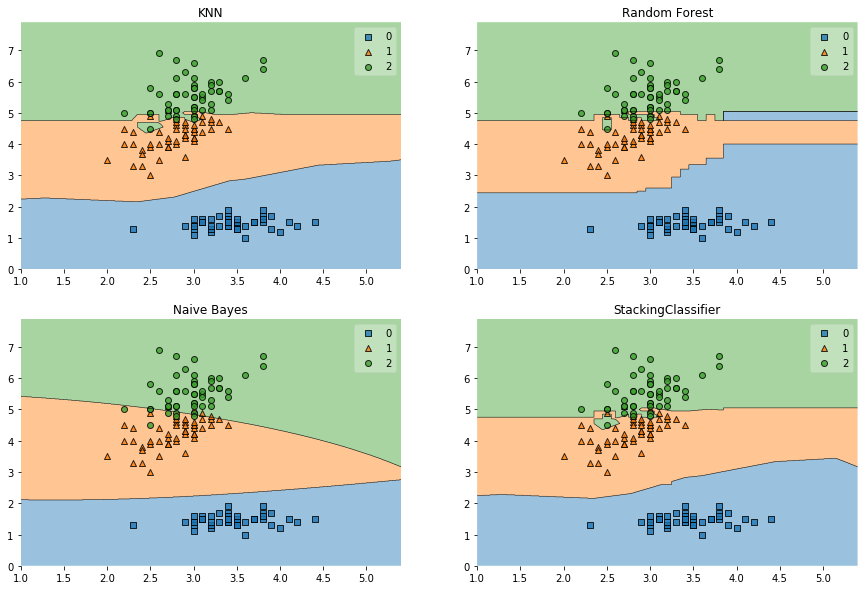

In [2]:
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
%matplotlib inline
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(15,10),facecolor='w')

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          meta_classifier=lr)

for clf, label, grd in zip([clf1, clf2, clf3, sclf],
                           ['KNN',
                            'Random Forest',
                            'Naive Bayes',
                            'StackingClassifier'],
                           itertools.product([0, 1], repeat=2)):

    scores = model_selection.cross_val_score(clf, X, y,
                                             cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)

Accuracy: 0.91 (+/- 0.01) [KNN]


Accuracy: 0.91 (+/- 0.06) [Random Forest]


Accuracy: 0.92 (+/- 0.03) [Naive Bayes]


Accuracy: 0.94 (+/- 0.03) [StackingClassifier]


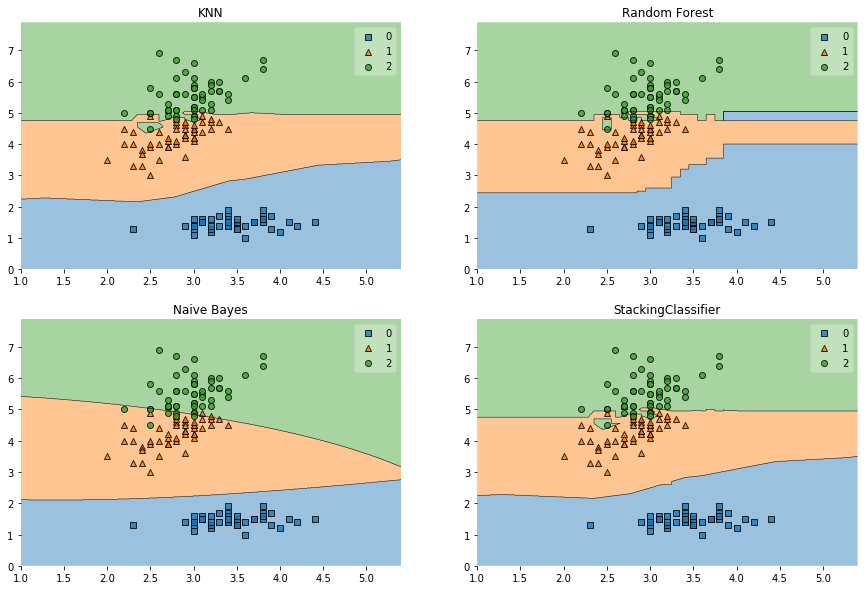

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
%matplotlib inline

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(15,10),facecolor='w')

for clf, label, grd in zip([clf1, clf2, clf3, sclf],
                      ['KNN',
                       'Random Forest',
                       'Naive Bayes',
                       'StackingClassifier'],
                           itertools.product([0, 1], repeat=2)):

    scores = model_selection.cross_val_score(clf, X, y,
                                             cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
    clf.fit(X, y)
    plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)

# 3.对训练基中的特征维度进行操作的
这次不是给每一个基分类器全部的特征，而是给不同的基分类器分不同的特征，即比如基分类器1训练前半部分特征，基分类器2训练后半部分特征（可以通过sklearn 的pipelines 实现）。最终通过StackingClassifier组合起来。

In [4]:
from sklearn.datasets import load_iris
from mlxtend.classifier import StackingClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
%matplotlib inline
iris = load_iris()
X = iris.data
y = iris.target

pipe1 = make_pipeline(ColumnSelector(cols=(0, 2)),
                      LogisticRegression())
pipe2 = make_pipeline(ColumnSelector(cols=(1, 2, 3)),
                      LogisticRegression())

sclf = StackingClassifier(classifiers=[pipe1, pipe2],
                          meta_classifier=LogisticRegression())

sclf.fit(X, y)
scores = model_selection.cross_val_score(clf, X, y,
                                         cv=3, scoring='accuracy')
print(scores.mean())

0.9673202614379085
